In [45]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [46]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

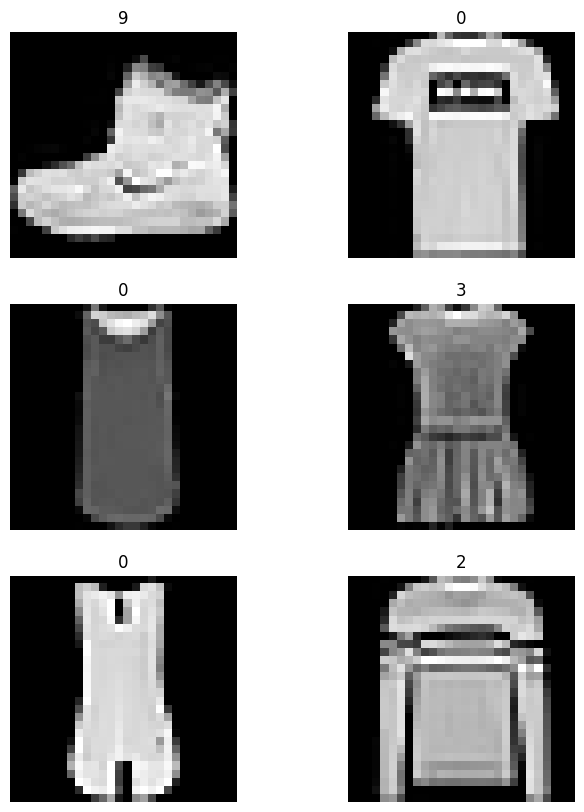

In [47]:
i=0
plt.figure(figsize=(8, 10))
for x in x_train[:6] : 
    plt.subplot(3 ,2 , i+1)
    plt.imshow(x, cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
    i+=1

plt.show()

In [48]:
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(-1 , 784)
x_test = x_test.reshape(-1 , 784)

In [49]:
y_train , y_test = keras.utils.to_categorical(y_train,10) , keras.utils.to_categorical(y_test,10)


In [50]:
model = keras.Sequential([
    keras.layers.Dense(128 , activation='relu' ,  input_shape=(28*28 , )) ,
    keras.layers.Dense(10 , activation='softmax')
])


c:\Users\eddaoudi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [59]:
history =model.fit(x_train , y_train , epochs=15 )

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9291 - loss: 0.1902
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9287 - loss: 0.1861
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9337 - loss: 0.1781
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9324 - loss: 0.1768
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9336 - loss: 0.1722
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9377 - loss: 0.1646
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9381 - loss: 0.1647
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9383 - loss: 0.1621
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9405 - loss: 0.1543
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9420 - loss: 0.1542
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9448 - loss: 0.1468
Epoch 12/15
1875

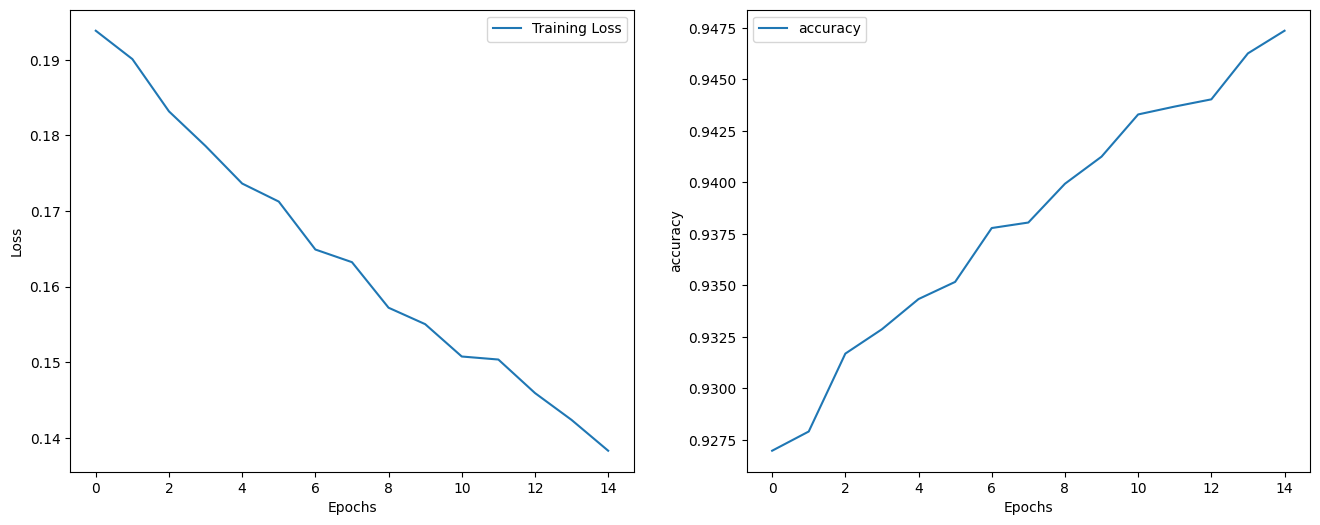

In [61]:
plt.figure(figsize=(16,6))
plt.subplot(1 ,2 ,1)
plt.plot(history.history['loss'] , label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1 ,2 ,2)
plt.plot(history.history['accuracy'] , label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()


In [62]:
test_loss , test_accuarcy = model.evaluate(x_test , y_test , verbose = 2)

313/313 - 1s - 4ms/step - accuracy: 0.8864 - loss: 0.4058


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


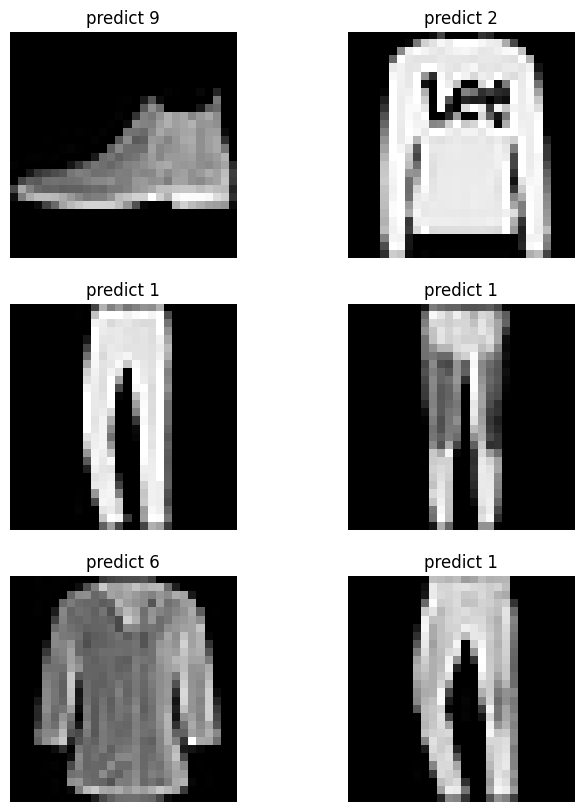

In [60]:
new_x_test= x_test[:6]
prediction = model.predict(new_x_test)
prediction_label = np.argmax(prediction , axis=1)
i=0
plt.figure(figsize=(8, 10))
for x in new_x_test : 
    plt.subplot(3 ,2 , i+1)
    plt.imshow(x.reshape(28 ,28) , cmap='gray')
    plt.title(f'predict {prediction_label[i]}')
    plt.axis('off')
    i+=1

plt.show()